In [41]:
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

In [43]:
# Загрузка данных
x_train = np.load('datasets/dataset1/x_train.npy')
y_train = np.load('datasets/dataset1/y_train.npy')

x_test = np.load('datasets/dataset1/x_test.npy')
y_test = np.load('datasets/dataset1/y_test.npy')

In [44]:
# Инициализация модели
model = LogisticRegression(
      solver='liblinear',
      C=100.0,
      random_state=0
)

# Обучение модели
model.fit(x_train, y_train)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')

In [45]:
# Предсказание на тестовых данных
y_pred = model.predict(x_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)

In [59]:
print(f'Точность модели: {accuracy * 100:.2f}%\n'
      f'Классы: {model.classes_}\n'
      f'Intercept: {model.intercept_}\n'
      f'Score: {model.score(x_train, y_train)}')

Точность модели: 96.36%
Классы: [0. 1.]
Intercept: [-0.35734132]
Score: 1.0


In [52]:
z = model.predict_proba(x_train)
z

array([[9.99998386e-01, 1.61415996e-06],
       [9.99999990e-01, 9.99726839e-09],
       [1.00000000e+00, 1.10240448e-15],
       [1.00000000e+00, 2.04558294e-12],
       [9.99980240e-01, 1.97595639e-05],
       [9.99997476e-01, 2.52443756e-06],
       [9.99999396e-01, 6.03592672e-07],
       [9.99999111e-01, 8.88943698e-07],
       [9.99999857e-01, 1.43357390e-07],
       [9.99999932e-01, 6.78673183e-08],
       [9.99999979e-01, 2.07550145e-08],
       [1.00000000e+00, 7.28285396e-11],
       [9.99999998e-01, 1.76410914e-09],
       [9.99999860e-01, 1.40461233e-07],
       [9.99999272e-01, 7.27961653e-07],
       [9.99986434e-01, 1.35655262e-05],
       [9.99999993e-01, 6.74747686e-09],
       [9.99999594e-01, 4.06189656e-07],
       [9.99998883e-01, 1.11698985e-06],
       [9.99994373e-01, 5.62661847e-06],
       [9.99999987e-01, 1.32234167e-08],
       [9.99888677e-01, 1.11323328e-04],
       [9.99890580e-01, 1.09420480e-04],
       [1.00000000e+00, 9.99553284e-13],
       [9.998316

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


ValueError: x and y must have same first dimension, but have shapes (220,) and (172480,)

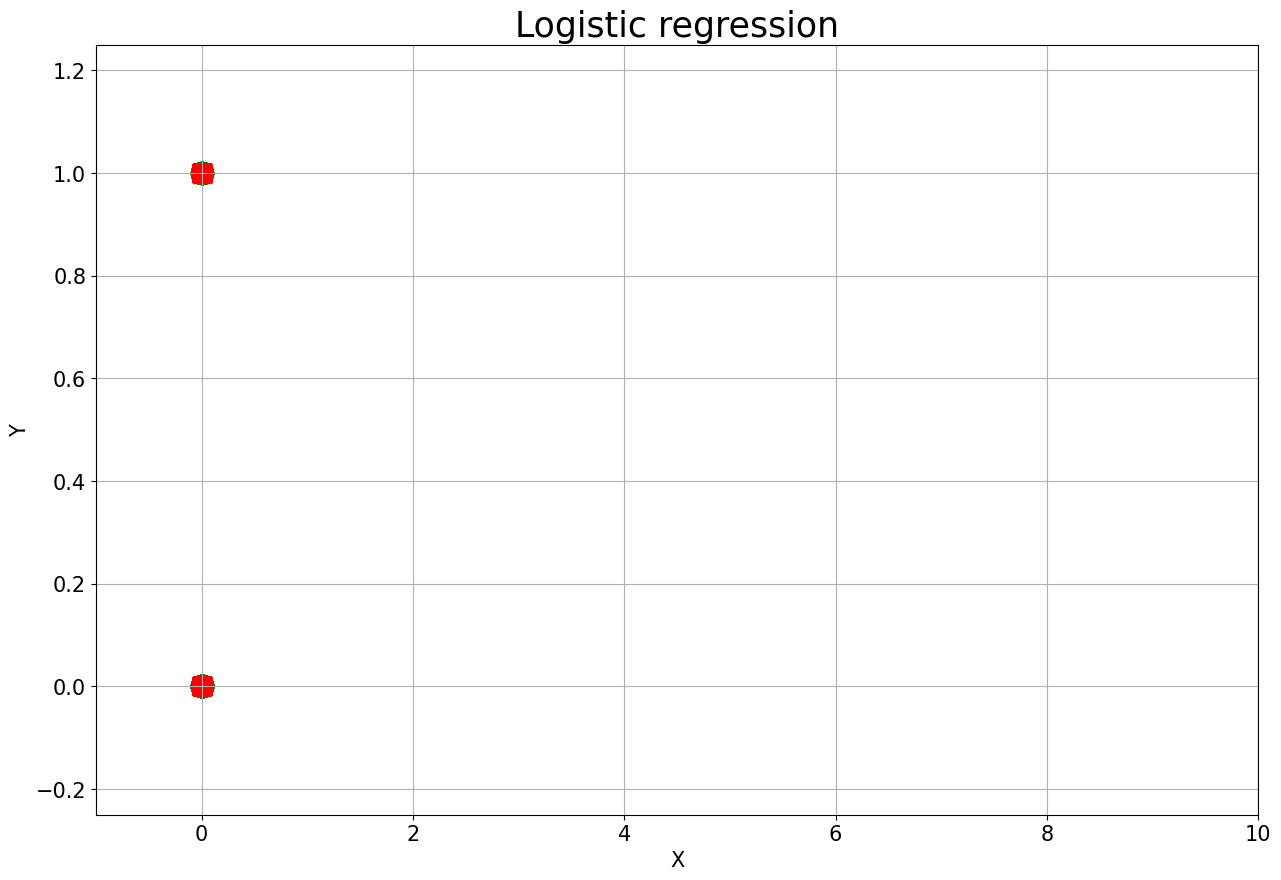

In [58]:
print(x_train)
print(y_train)

# Построение графика логистической регрессии
fig = plt.figure(figsize=(15, 10))

axes = plt.axes()
axes.set_xlim([-1, 10])
axes.set_ylim([-0.25, 1.25])
axes.grid(axis='both')
axes.set_xlabel('X', fontsize=15)
axes.set_ylabel('Y', fontsize=15)
axes.tick_params(axis='both', which='major', labelsize=20)
axes.tick_params(axis='both', which='major', labelsize=15)

legend = []

plt.title('Logistic regression', fontsize=25)

plt.scatter(x_train[:, 0], y_train, color='green', s=250, marker='o')
legend.append('Исходные данные')

plt.scatter(x_train[:, 0], z[:, 1], color='red', s=175, marker='s')
legend.append('Предсказанные данные')

loss = expit(x_test * model.coef_ + model.intercept_).ravel()

plt.plot(x_test[:, 0], loss, color='gray', linewidth=2)
plt.vlines(x_train[:, 0], y_train, z[:, 1], color='black', linewidth=2, linestyles='dashed')
legend.append('Регрессия')

plt.legend(legend, fontsize='xx-large', loc='upper left')

plt.show()